In [3]:
import pandas as pd 
import numpy as np

popdf = pd.read_csv('C:\\Users\Death\Downloads\Seminar\pop.csv', sep=',')

popdf.drop(columns=['GEO.id','GEO.id2','GCT_STUB.target-geo-id','GCT_STUB.target-geo-id2'], inplace=True)
popdf.rename(columns={'GEO.display-label':"state", 'GCT_STUB.display-label':'county','Density per square mile of land area':'density'}, inplace=True)
popdf=popdf[popdf.state != 'Puerto Rico']
popdf['county']=popdf['county'].str.replace('County','')
popdf = popdf.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

popdf.head(3143)


,state,county,density
0,Alabama,Autauga,91.8
1,Alabama,Baldwin,114.6
2,Alabama,Barbour,31.0
3,Alabama,Bibb,36.8
4,Alabama,Blount,88.9
...,...,...,...
3138,Wyoming,Sweetwater,4.2
3139,Wyoming,Teton,5.3
3140,Wyoming,Uinta,10.1
3141,Wyoming,Washakie,3.8


In [4]:
covdf = pd.read_excel('C:\\Users\Death\Downloads\Seminar\covid.xlsx', sep=',')
covdf.dropna(how='any')
covdf.drop(columns=['fips','deaths'], inplace=True)
covdf=covdf[covdf.state != 'Puerto Rico']
#gcd=covdf.groupby(['county', 'state']).sum().replace(0,np.nan)
covdf=covdf.loc[(covdf['date']) == '2020-09-26']
covdf.drop(columns=['date'], inplace=True)
covdf


,county,state,cases
570096,Autauga,Alabama,1764
570097,Baldwin,Alabama,5477
570098,Barbour,Alabama,882
570099,Bibb,Alabama,654
570100,Blount,Alabama,1611
...,...,...,...
573333,Sweetwater,Wyoming,332
573334,Teton,Wyoming,536
573335,Uinta,Wyoming,350
573336,Washakie,Wyoming,113


In [ ]:

fdf=popdf.merge(covdf, on=['state','county'], how='inner')
fdf
fdf['loc'] = fdf['state'].str.cat(fdf['county'],sep=" ")
fdf = fdf[['state','county','loc','density','cases']]
X = fdf.iloc[:, -2:-1]
fdf['loc']=pd.to_numeric(fdf['loc'], errors='coerce')
y = fdf.iloc[:, -1:]
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


(0.0, 600.0)

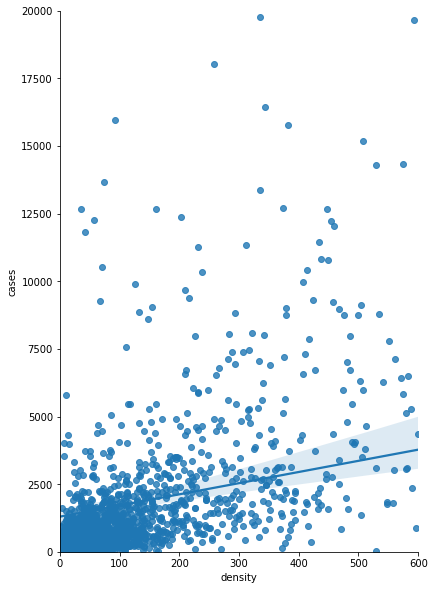

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.pairplot(fdf, x_vars=['density'], y_vars='cases', height=8, aspect=0.7, kind='reg')
g.axes[0,0].set_ylim((0,20000))
g.axes[0,0].set_xlim((0,600))

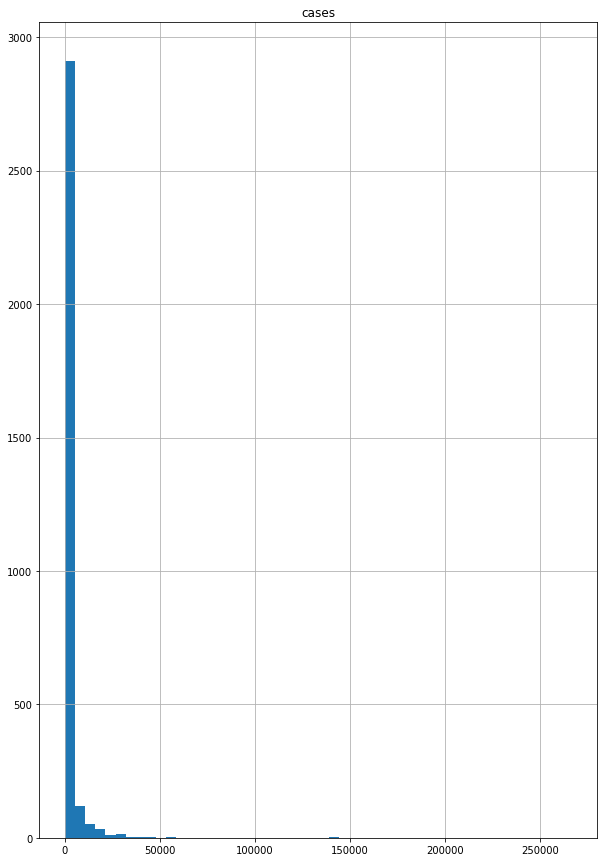

,county,state,cases
570096,Autauga,Alabama,1764
570097,Baldwin,Alabama,5477
570098,Barbour,Alabama,882
570099,Bibb,Alabama,654
570100,Blount,Alabama,1611
...,...,...,...
573333,Sweetwater,Wyoming,332
573334,Teton,Wyoming,536
573335,Uinta,Wyoming,350
573336,Washakie,Wyoming,113


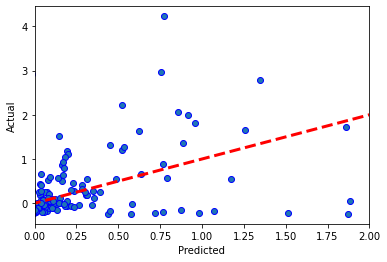

In [42]:
y_predicted = regressor.predict(X_test)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xlim(0,2)
plt.show()

In [45]:

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.24440208288583398
MSE is 0.58298116682314
R2 score is -2.046002836655803
